# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/Q1_clean.csv', low_memory=False)
df = df.rename(columns={'Neighbourhood ': 'Neighborhood'})
df.head()

,Price,Review Scores Rating,Neighborhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [17]:
df.groupby('Neighborhood').describe()

Price                                                      \
                 count        mean         std   min     25%    50%    75%   
Neighborhood                                                                 
Bronx            217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn        8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan      11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens          1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island     96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                       Review Scores Rating                                   \
                   max                count       mean       std   min   25%   
Neighborhood                                                                   
Bronx            244.0                217.0  91.654378  8.169239  60.0  88.0   
Brooklyn        4500.0               8487.0  92.363497  8.656563  20.0  90.0   
Manhattan      10000.0              11763.0  91.801496  8.840889  20.0  88.0   
Queens           950.0               1590.0  91.549057  9.895860  20.0  88.0   
Staten Island   5000.0                 96.0  90.843750  9.137923  40.0  87.0   

                                   
                50%    75%    max  
Neighborhood                       
Bronx          93.0   99.0  100.0  
Brooklyn       94.0  100.0  100.0  
Manhattan      93.0   99.0  100.0  
Queens         94.0  100.0  100.0  
Staten Island  92.0   97.0  100.0

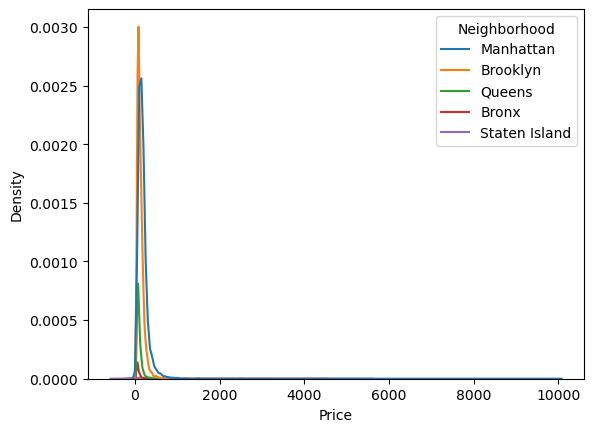

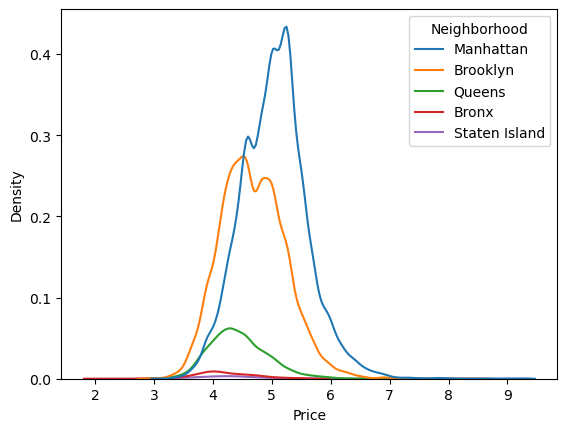

In [18]:
sns.kdeplot(data=df,x=df['Price'],hue=df['Neighborhood'])
plt.show()

sns.kdeplot(data=df,x=np.log(df['Price']),hue=df['Neighborhood'])
plt.show()

>Manhattan has the highest mean, median, and max price listing, with the average price being $184.

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [25]:
from sklearn.linear_model import LinearRegression

# assign X and Y data
y = df['Price']
x = pd.get_dummies(df['Neighborhood'],dtype='int')

regression = LinearRegression(fit_intercept=False).fit(x, y) # computes the regression
results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_}) # Regression coefficients (gotten from notes)
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


>The regression coefficients directly match up with the computed mean grouped by neighborhood. This makes sense because all the price data was used and it was only looking at neighborhood, so it should be a perfect predictor of the given data. Thus the coefficients of a continuous on categorical regression is just the mean for each variable.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [24]:
# assign X and Y data
y = df['Price']
x = pd.get_dummies(df['Neighborhood'],dtype='int',drop_first=True) # dropping first means intercept can stay in...removes multicolinearity

regression = LinearRegression().fit(x, y) # computes the regression
results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_}) # Regression coefficients (gotten from notes)
print(regression.intercept_)
results

75.2764976958528


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


> The intercept is 75.277, which is the mean value/coefficient for the Bronx price. All of the variables are being compared to this value, so adding the intercept to each coefficient yields the true mean. `(regression.coef_ + regression.intercept_)`

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
x = df.loc[:,['Neighborhood','Review Scores Rating']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

# was getting weird answers, had to look at solutions. Forgot to turn Neighborhood into a dummy variable and concat dataframes
z_train = pd.concat([x_train['Review Scores Rating'], pd.get_dummies(x_train['Neighborhood'], dtype='int')], axis = 1)
z_test = pd.concat([x_test['Review Scores Rating'], pd.get_dummies(x_test['Neighborhood'], dtype='int')], axis = 1)

regression = LinearRegression(fit_intercept=False).fit(z_train, y_train) # computes the regression

# does the predictions
y_hat = regression.predict(z_test)

# prints R^2, RMSE, and Coefficients
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('Rsq: ',regression.score(z_test,y_test))
print('Rmse: ',rmse)
results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_}) # Regression coefficients (gotten from notes)
results

Rsq:  0.06701086106947296
Rmse:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


> 0 variable is Coefficient * x, and add the coefficient to get the true predicted price. With a max score of 100 and the highest coefficient belonging to Manhattan at 89.42, the price would be 100 * 1.03 + 89.42 = $192.42

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [40]:
# do the same thing as part 4, just add property type and make sure to make it a dummy

y = df['Price']
x = df.loc[:,['Review Scores Rating','Neighborhood','Room Type']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

z_train = pd.concat([x_train['Review Scores Rating'], 
                    pd.get_dummies(x_train['Neighborhood'], dtype='int'),
                    pd.get_dummies(x_train['Room Type'], dtype='int')],
                    axis = 1)
z_test = pd.concat([x_test['Review Scores Rating'], 
                    pd.get_dummies(x_test['Neighborhood'], dtype='int'),
                    pd.get_dummies(x_test['Room Type'], dtype='int')],
                    axis = 1)

regression = linear_model.LinearRegression(fit_intercept=False).fit(z_train, y_train) # computes the regression

# does the predictions
y_hat = regression.predict(z_test)

# prints R^2, RMSE, and Coefficients
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('Rsq: ',regression.score(z_test,y_test))
print('Rmse: ',rmse)
results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_}) # Regression coefficients (gotten from notes)
results

Rsq:  0.22035348129282317
Rmse:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


> `Property Type` is asked for but that did not seem to work? Looked at solutions and `Room Type` was used instead. Highest predicted price is 0.626912 * 100 + 53.693304 + 110.617820 = $227

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


> The coefficient decreases from 1.03 to 0.63. This decrease is caused by adding `Room Type` to the regression. Room type is able to explain some of the price variation, so some of the "explanatory power" that was previously put into `Review Scores Rating` was extracted and put into the room type. Review Scores Rating is a less weighted predictor once room type is added.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

> I do not know how to use LaTeX, so I have attached an image of my proofs for parts 1-3 in the repository. b* will be large if the covariance between x and y is large and/or the variance in x is small, and vice versa for b* being small. Since a* = y_bar, a* represents the mean value of y. If a measurement error in x artificially infaltes its variance, b* will become quite small. This will lead to smaller predicted values than what is "true" in a narrower range of values.